In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
psse_bus_data = pd.read_csv('psse_buses.csv')
psse_generator_data = pd.read_csv('psse_generators.csv')
pypsa_bus_data = pd.read_csv('pypsa_buses.csv')
pypsa_generator_data = pd.read_csv('pypsa_generators.csv')

In [27]:
pypsa_bus_data

,Bus,p,q,v_mag_pu,v_mag_pu_set,v_ang,mismatch,time_s
0,1,13.178339,-111.547059,1.000000,NaN,0.000000,8.384404e-13,0.0
1,10,-100.000000,-23.000000,1.005391,NaN,0.033608,2.237981e+02,0.0
2,11,0.000000,0.000000,0.990402,NaN,0.151724,2.546880e+02,0.0
3,12,0.000000,0.000000,0.989454,NaN,0.140167,2.275320e+02,0.0
4,13,70.000000,23.044123,1.000000,NaN,0.185431,1.207923e-12,0.0
...,...,...,...,...,...,...,...,...
3595,5,-71.190452,-14.000000,0.988192,NaN,-0.013458,8.398615e-12,42900.0
3596,6,-68.131627,-14.000000,1.018806,NaN,-0.008482,7.062795e-12,42900.0
3597,7,1.934570,28.845516,1.000000,NaN,-0.036007,2.089049e+00,42900.0
3598,8,-85.085816,-18.000000,0.981555,NaN,-0.032426,8.508582e+01,42900.0


In [28]:
psse_bus_data

,BUS_ID,BUS_ID.1,BUS_TYPE,Pd,Qd,Pg,Qg,P,Q,V_PU,V_KV,BASE_KV,ANGLE_DEG,ANGLE_RAD,MISMATCH,time_s
0,0,1,3,0.0,0.000000,24.709679,65.376091,24.709679,65.376091,1.000000,138.000000,138.0,0.000000,0.000000,0.000003,0.0
1,1,2,2,97.0,20.000000,67.000000,0.000000,-30.000000,-20.000000,0.998570,137.802628,138.0,-0.006519,-0.000114,0.000006,0.0
2,2,3,1,90.0,19.000000,0.000000,0.000000,-90.000000,-19.000000,0.908059,125.312180,138.0,9.322610,0.162710,0.000006,0.0
3,3,4,1,74.0,15.000001,0.000000,0.000000,-74.000000,-15.000001,0.925067,127.659218,138.0,-0.675681,-0.011793,0.000003,0.0
4,4,5,1,71.0,14.000000,0.000000,0.000000,-71.000000,-14.000000,0.958868,132.323822,138.0,-0.503819,-0.008793,0.000003,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,20,21,2,0.0,0.000000,294.000000,0.000000,294.000000,0.000000,0.939450,216.073486,230.0,31.761387,0.554341,0.000003,42900.0
3596,21,22,2,0.0,0.000000,150.000000,126.865158,150.000000,126.865158,1.000000,230.000000,230.0,33.774643,0.589479,0.000006,42900.0
3597,22,23,2,0.0,0.000000,200.000000,0.000000,200.000000,0.000000,0.905711,208.313599,230.0,18.942007,0.330600,0.000003,42900.0
3598,23,24,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.895935,206.064941,230.0,21.830488,0.381014,0.000000,42900.0


In [29]:
psse_generator_data

,GEN_ID,BUS_ID,GEN_ID.1,Pg,Qg,MBASE,STATUS,MISMATCH,PERCENT,time_s
0,0,1,1,24.709679,65.376091,100.0,1,0.000003,69.889923,0.0
1,1,2,1,67.000000,0.000000,100.0,1,0.000006,67.000000,0.0
2,2,7,1,64.000000,0.000000,100.0,1,0.000012,64.000000,0.0
3,3,13,1,200.000000,0.000000,100.0,1,0.000000,200.000000,0.0
4,4,14,1,0.000000,0.000000,100.0,1,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
1723,7,18,1,144.000000,0.000000,100.0,1,0.000012,144.000000,42900.0
1724,8,21,1,294.000000,0.000000,100.0,1,0.000003,294.000000,42900.0
1725,9,22,1,150.000000,126.865158,100.0,1,0.000006,196.455521,42900.0
1726,10,23,1,200.000000,0.000000,100.0,1,0.000003,200.000000,42900.0


In [30]:
pypsa_generator_data

,Generator,p,q,time_s
0,G0,13.178339,-111.547059,0.0
1,G1,67.000000,56.390638,0.0
2,G2,64.000000,41.774557,0.0
3,G3,200.000000,50.044123,0.0
4,G4,0.000000,68.874432,0.0
...,...,...,...,...
2731,G4-RM3-60,0.019310,0.000000,42900.0
2732,G5-RM3-60,0.019310,0.000000,42900.0
2733,G6-RM3-60,0.019310,0.000000,42900.0
2734,G7-RM3-60,0.019310,0.000000,42900.0


In [31]:
import numpy as np

def analyze_power_difference(p1, p2):
    """
    Compute RMSE and Pearson correlation coefficient between two power time series.

    Parameters:
    - p1: first time series (e.g., P from PSS®E)
    - p2: second time series (e.g., P from PyPSA)

    Returns:
    - rmse: Root Mean Square Error
    - corr: Pearson correlation coefficient
    """
    if len(p1) != len(p2):
        raise ValueError("Time series must be of equal length for comparison.")
    
    diff = np.array(p1) - np.array(p2)
    rmse = np.sqrt(np.mean(diff**2))
    corr = np.corrcoef(p1, p2)[0, 1]

    return rmse, corr

In [32]:

def plot_bus_power_comparison(
    psse_df, pypsa_df,
    psse_p_col, pypsa_p_col,
    bus_id, outfile_name,
    psse_label="PSS®E", pypsa_label="PyPSA",
    annotation_loc=None, legend_loc='upper right'
):
    """
    Plots active power comparison for a given bus from PSS®E and PyPSA results,
    and shows RMSE and Correlation on the plot.

    Parameters:
    - psse_df, pypsa_df: DataFrames containing bus data
    - psse_p_col, pypsa_p_col: column names for power in each DataFrame
    - bus_id: the bus number to extract
    - outfile_name: path to save SVG
    - annotation_loc: (optional) legend placement as string: 'upper left', etc.
    - legend_loc: location for legend
    """
    # Filter data
    psse_bus = psse_df[psse_df['BUS_ID.1'] == bus_id]
    pypsa_bus = pypsa_df[pypsa_df['Bus'] == bus_id]

    # Convert time
    time_psse_hr = psse_bus['time_s'] / 3600
    time_pypsa_hr = pypsa_bus['time_s'] / 3600

    # Extract P
    p_psse = psse_bus[psse_p_col]
    p_pypsa = pypsa_bus[pypsa_p_col]

    # --- Analysis ---
    try:
        rmse, corr = analyze_power_difference(p_psse.values, p_pypsa.values)
        annotation = f"RMSE = {rmse:.3f} MW\nCorr  = {corr:.3f}"
        print(f"[Bus {bus_id}] {annotation.replace(chr(10), ', ')}")
    except Exception as e:
        annotation = "Analysis Failed"
        print(f"[Bus {bus_id}] Analysis failed: {e}")

    # --- Determine annotation placement ---
    ha, va = 'left', 'top'  # default
    if annotation_loc is None:
        median_val = np.median(p_psse.values)
        if median_val < 20:
            annotation_coords = (0.98, 0.02)  # bottom right
            ha, va = 'right', 'bottom'
        else:
            annotation_coords = (0.02, 0.98)  # top left
            ha, va = 'left', 'top'
    else:
        loc_map = {
            'upper left': ((0.02, 0.98), 'left', 'top'),
            'upper right': ((0.98, 0.98), 'right', 'top'),
            'lower left': ((0.02, 0.02), 'left', 'bottom'),
            'lower right': ((0.98, 0.02), 'right', 'bottom')
        }
        annotation_coords, ha, va = loc_map.get(annotation_loc, ((0.02, 0.98), 'left', 'top'))

    # --- Plot config ---
    plt.rcParams.update({
        "font.size": 11.5,
        "axes.titlesize": 12,
        "axes.labelsize": 11.5,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "legend.fontsize": 10,
        "axes.grid": True,
        "grid.alpha": 0.4,
        "grid.color": "#999999",
        "grid.linestyle": "--",
        "xtick.direction": "in",
        "ytick.direction": "in"
    })

    fig, ax = plt.subplots(figsize=(6.6, 5.0))

    # Plot
    ax.plot(time_psse_hr, p_psse, label=f'{psse_label} - Bus {bus_id}',
            color='#1f77b4', marker='o', markersize=2.5, linewidth=1)
    ax.plot(time_pypsa_hr, p_pypsa, label=f'{pypsa_label} - Bus {bus_id}',
            color='#d62728', marker='s', markersize=2.5, linewidth=1)

    # Labels
    ax.set_xlabel("Time [hr]")
    ax.set_ylabel("Active Power $P$ [MW]")

    # Grid & legend
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth=0.4, alpha=0.5)
    ax.legend(loc=legend_loc, frameon=False)

    # Annotation text box
    ax.text(
        annotation_coords[0], annotation_coords[1], annotation,
        transform=ax.transAxes,
        verticalalignment=va,
        horizontalalignment=ha,
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
    )

    # Save & show
    plt.tight_layout()
    plt.savefig(outfile_name, format="svg")
    plt.show()
    plt.close()

[Bus 1] RMSE = 10.662 MW, Corr  = 0.999


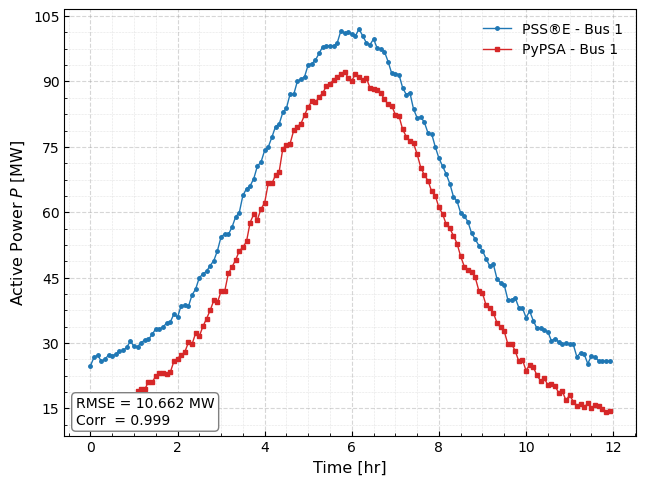

[Bus 7] RMSE = 0.167 MW, Corr  = 0.988


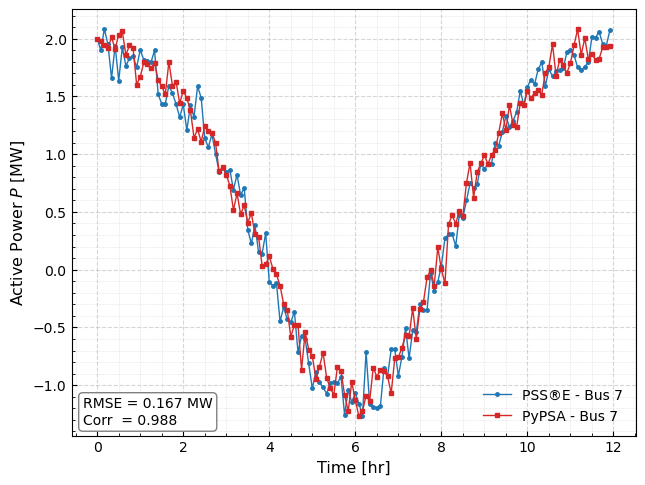

[Bus 25] RMSE = 0.000 MW, Corr  = 1.000


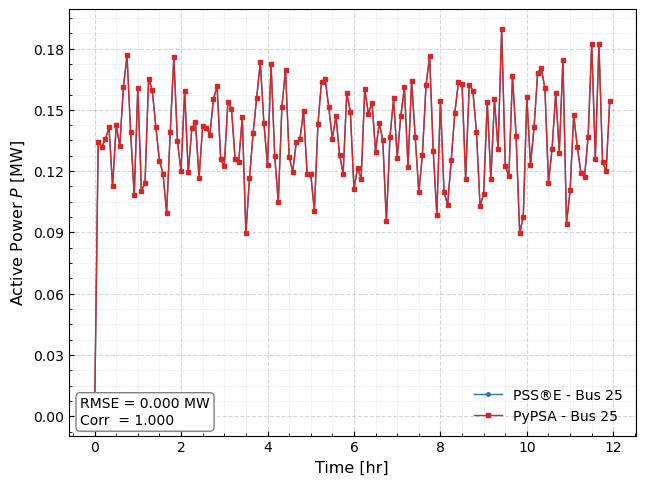

In [33]:
plot_bus_power_comparison(
    psse_df=psse_bus_data,
    pypsa_df=pypsa_bus_data,
    psse_p_col='P',
    pypsa_p_col='p',
    bus_id=1,
    outfile_name="active_power_bus25.svg",
    annotation_loc='lower left',
    legend_loc='upper right'
)
plot_bus_power_comparison(
    psse_df=psse_bus_data,
    pypsa_df=pypsa_bus_data,
    psse_p_col='P',
    pypsa_p_col='p',
    bus_id=7,
    outfile_name="active_power_bus25.svg",
    annotation_loc='lower left',
    legend_loc='lower right'
)
plot_bus_power_comparison(
    psse_df=psse_bus_data,
    pypsa_df=pypsa_bus_data,
    psse_p_col='P',
    pypsa_p_col='p',
    bus_id=25,
    outfile_name="active_power_bus25.svg",
    annotation_loc='lower left',
    legend_loc='lower right'
)


In [34]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_angle_difference(theta_psse, theta_pypsa):
    diff = np.array(theta_psse) - np.array(theta_pypsa)
    rmse = np.sqrt(np.mean(diff**2))
    corr = np.corrcoef(theta_psse, theta_pypsa)[0, 1]
    return rmse, corr

def plot_bus_angle_spread_comparison(
    psse_df, pypsa_df,
    swing_bus, target_bus,
    outfile_name,
    angle_col_psse='ANGLE_DEG',
    angle_col_pypsa='v_ang',
    time_col='time_s',
    angle_unit_pypsa='rad',
    psse_label='PSS®E',
    pypsa_label='PyPSA',
    annotation_loc=None,
    legend_loc='upper right'
):
    """
    Compares Δθ = θ_swing - θ_target between PSSE and PyPSA, and plots results.

    Parameters:
    - psse_df, pypsa_df: long-format DataFrames (Bus, angle, time)
    - swing_bus, target_bus: bus IDs to compare
    - outfile_name: name of the SVG output file
    - angle_col_psse, angle_col_pypsa: column names for voltage angle
    - time_col: time column name (assumed in seconds)
    - angle_unit_pypsa: 'rad' or 'deg'
    - psse_label, pypsa_label: label prefixes
    - annotation_loc, legend_loc: text positions
    """
    # --- Filter and sort PSSE data ---
    df_psse_swing = psse_df[psse_df['BUS_ID.1'] == swing_bus].sort_values(time_col)
    df_psse_target = psse_df[psse_df['BUS_ID.1'] == target_bus].sort_values(time_col)
    time_psse_hr = df_psse_swing[time_col].values / 3600

    # Compute Δθ for PSSE: swing - target
    theta_psse = df_psse_swing[angle_col_psse].values - df_psse_target[angle_col_psse].values

    # --- Filter and sort PyPSA data ---
    df_pypsa_swing = pypsa_df[pypsa_df['Bus'] == swing_bus].sort_values(time_col)
    df_pypsa_target = pypsa_df[pypsa_df['Bus'] == target_bus].sort_values(time_col)
    time_pypsa_hr = df_pypsa_swing[time_col].values / 3600

    # Compute Δθ for PyPSA (convert to deg if needed)
    theta_pypsa_swing = df_pypsa_swing[angle_col_pypsa].values
    theta_pypsa_target = df_pypsa_target[angle_col_pypsa].values
    if angle_unit_pypsa == 'rad':
        theta_pypsa = np.rad2deg(theta_pypsa_swing - theta_pypsa_target)
    else:
        theta_pypsa = theta_pypsa_swing - theta_pypsa_target

    # --- Analysis ---
    try:
        rmse, corr = analyze_angle_difference(theta_psse, theta_pypsa)
        annotation = f"RMSE = {rmse:.3f}°\nCorr  = {corr:.3f}"
        print(f"[Δθ: Bus {swing_bus} - {target_bus}] {annotation.replace(chr(10), ', ')}")
    except Exception as e:
        annotation = "Analysis Failed"
        print(f"[Δθ: Bus {swing_bus}] Analysis failed: {e}")

    # --- Annotation placement ---
    ha, va = 'left', 'top'
    if annotation_loc is None:
        median_val = np.median(theta_psse)
        if abs(median_val) < 5:
            annotation_coords = (0.98, 0.02)
            ha, va = 'right', 'bottom'
        else:
            annotation_coords = (0.02, 0.98)
            ha, va = 'left', 'top'
    else:
        loc_map = {
            'upper left': ((0.02, 0.98), 'left', 'top'),
            'upper right': ((0.98, 0.98), 'right', 'top'),
            'lower left': ((0.02, 0.02), 'left', 'bottom'),
            'lower right': ((0.98, 0.02), 'right', 'bottom')
        }
        annotation_coords, ha, va = loc_map.get(annotation_loc, ((0.02, 0.98), 'left', 'top'))

    # --- Plot setup ---
    plt.rcParams.update({
        "font.size": 11.5,
        "axes.titlesize": 12,
        "axes.labelsize": 11.5,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "legend.fontsize": 10,
        "axes.grid": True,
        "grid.alpha": 0.4,
        "grid.color": "#999999",
        "grid.linestyle": "--",
        "xtick.direction": "in",
        "ytick.direction": "in"
    })

    fig, ax = plt.subplots(figsize=(6.6, 5.0))

    # --- Plot data ---
    ax.plot(time_psse_hr, theta_psse, label=f'{psse_label} Δθ (Bus {swing_bus}-{target_bus})',
            color='#1f77b4', marker='o', markersize=2.5, linewidth=1)
    ax.plot(time_pypsa_hr, theta_pypsa, label=f'{pypsa_label} Δθ (Bus {swing_bus}-{target_bus})',
            color='#d62728', marker='s', markersize=2.5, linewidth=1)

    ax.set_xlabel("Time [hr]")
    ax.set_ylabel("Voltage Angle Spread Δθ [deg]")
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth=0.4, alpha=0.5)
    ax.legend(loc=legend_loc, frameon=False)

    # --- Add annotation ---
    ax.text(
        annotation_coords[0], annotation_coords[1], annotation,
        transform=ax.transAxes,
        verticalalignment=va,
        horizontalalignment=ha,
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
    )

    # --- Save ---
    plt.tight_layout()
    plt.savefig(outfile_name, format="svg")
    plt.show()
    plt.close()

[Δθ: Bus 1 - 25] RMSE = 0.733°, Corr  = 0.999


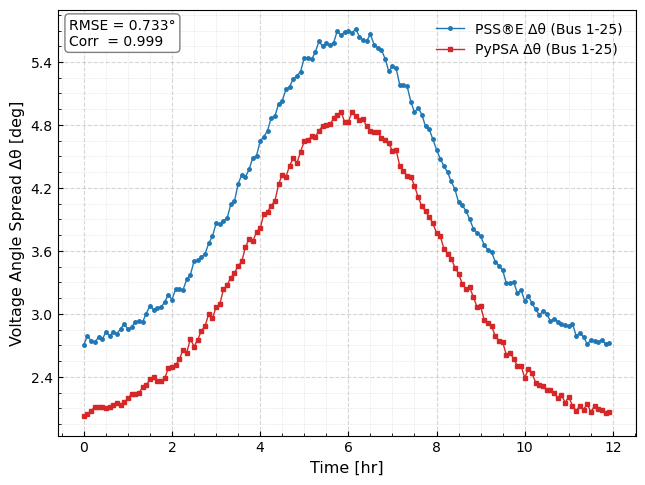

In [35]:
plot_bus_angle_spread_comparison(
    psse_df=psse_bus_data,
    pypsa_df=pypsa_bus_data,
    swing_bus=1,
    target_bus=25,
    annotation_loc='upper left',
    legend_loc='upper right',
    outfile_name='delta_theta_comparison_bus25_bus1.svg'
)


In [36]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_generator_power(pg_psse, p_pypsa):
    diff = np.array(pg_psse) - np.array(p_pypsa)
    rmse = np.sqrt(np.mean(diff**2))
    corr = np.corrcoef(pg_psse, p_pypsa)[0, 1]
    return rmse, corr

def plot_generator_power_comparison(
    psse_df, pypsa_df,
    psse_gen_id, pypsa_gen_id,
    outfile_name,
    psse_label='PSS®E', pypsa_label='PyPSA',
    annotation_loc=None, legend_loc='upper right'
):
    """
    Plots active power output of a generator from PSSE and PyPSA at the same bus.

    Parameters:
    - psse_df: PSSE generator DataFrame
    - pypsa_df: PyPSA generator DataFrame
    - psse_bus_id: bus ID to match generator in PSSE
    - pypsa_gen_id: generator name in PyPSA (e.g., 'G0')
    - outfile_name: SVG output file name
    """
    # Filter PSSE by bus
    psse_gen = psse_df[psse_df['GEN_ID'] == psse_gen_id].sort_values('time_s')
    time_psse_hr = psse_gen['time_s'].values / 3600
    pg_psse = psse_gen['Pg'].values

    # Filter PyPSA by generator ID
    pypsa_gen = pypsa_df[pypsa_df['Generator'] == pypsa_gen_id].sort_values('time_s')
    time_pypsa_hr = pypsa_gen['time_s'].values / 3600
    p_pypsa = pypsa_gen['p'].values

    # Analysis
    try:
        rmse, corr = analyze_generator_power(pg_psse, p_pypsa)
        annotation = f"RMSE = {rmse:.3f} MW\nCorr  = {corr:.3f}"
        print(f"[G{pypsa_gen_id}] {annotation.replace(chr(10), ', ')}")
    except Exception as e:
        annotation = "Analysis Failed"
        print(f"[GEN {pypsa_gen_id}] Analysis failed: {e}")

    # Annotation placement
    ha, va = 'left', 'top'
    if annotation_loc is None:
        median_val = np.median(pg_psse)
        if median_val < 20:
            annotation_coords = (0.98, 0.02)
            ha, va = 'right', 'bottom'
        else:
            annotation_coords = (0.02, 0.98)
            ha, va = 'left', 'top'
    else:
        loc_map = {
            'upper left': ((0.02, 0.98), 'left', 'top'),
            'upper right': ((0.98, 0.98), 'right', 'top'),
            'lower left': ((0.02, 0.02), 'left', 'bottom'),
            'lower right': ((0.98, 0.02), 'right', 'bottom')
        }
        annotation_coords, ha, va = loc_map.get(annotation_loc, ((0.02, 0.98), 'left', 'top'))

    # Plot
    plt.rcParams.update({
        "font.size": 11.5,
        "axes.titlesize": 12,
        "axes.labelsize": 11.5,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "legend.fontsize": 10,
        "axes.grid": True,
        "grid.alpha": 0.4,
        "grid.color": "#999999",
        "grid.linestyle": "--",
        "xtick.direction": "in",
        "ytick.direction": "in"
    })

    fig, ax = plt.subplots(figsize=(6.6, 5.0))

    ax.plot(time_psse_hr, pg_psse, label=f'{psse_label} -  G{psse_gen_id}',
            color='#1f77b4', marker='o', markersize=2.5, linewidth=1)
    ax.plot(time_pypsa_hr, p_pypsa, label=f'{pypsa_label} - {pypsa_gen_id}',
            color='#d62728', marker='s', markersize=2.5, linewidth=1)

    ax.set_xlabel("Time [hr]")
    ax.set_ylabel("Active Power $P_G$ [MW]")
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth=0.4, alpha=0.5)
    ax.legend(loc=legend_loc, frameon=False)

    ax.text(
        annotation_coords[0], annotation_coords[1], annotation,
        transform=ax.transAxes,
        verticalalignment=va,
        horizontalalignment=ha,
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
    )

    plt.tight_layout()
    plt.savefig(outfile_name, format="svg")
    plt.show()
    plt.close()

[GG0] RMSE = 10.662 MW, Corr  = 0.999


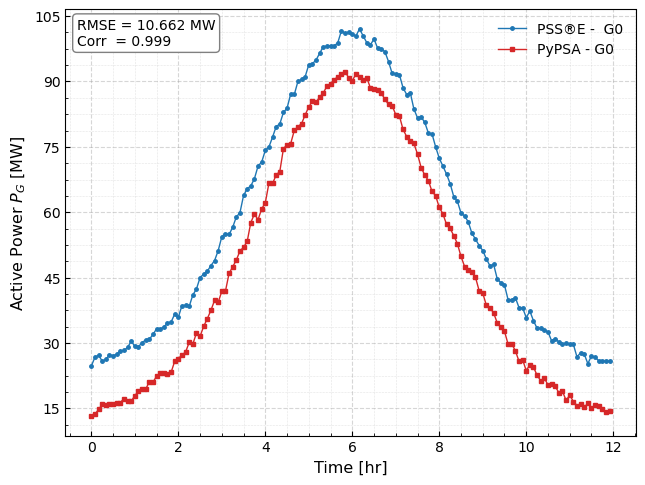

In [37]:
plot_generator_power_comparison(
    psse_df=psse_generator_data,
    pypsa_df=pypsa_generator_data,
    psse_gen_id=0,
    pypsa_gen_id='G0',
    outfile_name='test_generator_power_bus1.svg'
)


[Bus 8] Voltage: RMSE = 0.0279 p.u., Corr  = -0.9593


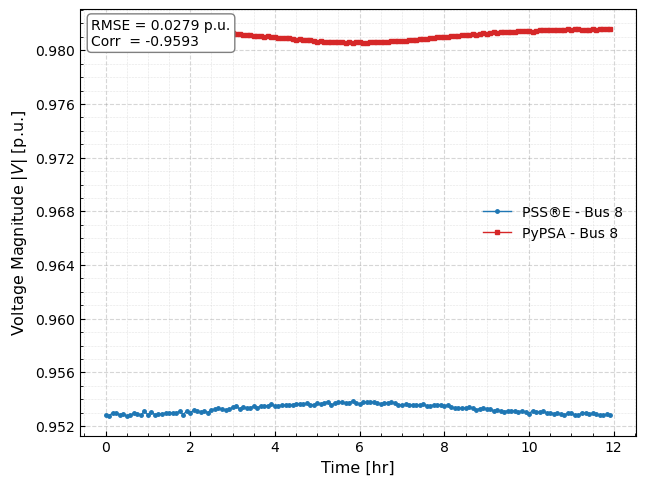

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_series_difference(series_a, series_b):
    diff = np.array(series_a) - np.array(series_b)
    rmse = np.sqrt(np.mean(diff**2))
    corr = np.corrcoef(series_a, series_b)[0, 1]
    return rmse, corr

def plot_voltage_comparison(
    psse_df, pypsa_df,
    bus_id, outfile_name,
    psse_label='PSS®E', pypsa_label='PyPSA',
    annotation_loc=None, legend_loc='upper right'
):
    """
    Compare per-unit voltage magnitude between PSS®E and PyPSA for a given bus.
    """
    psse = psse_df[psse_df['BUS_ID.1'] == bus_id].sort_values('time_s')
    pypsa = pypsa_df[pypsa_df['Bus'] == bus_id].sort_values('time_s')

    time_psse_hr = psse['time_s'].values / 3600
    time_pypsa_hr = pypsa['time_s'].values / 3600
    v_psse = psse['V_PU'].values
    v_pypsa = pypsa['v_mag_pu'].values

    # --- Analysis ---
    try:
        rmse, corr = analyze_series_difference(v_psse, v_pypsa)
        annotation = f"RMSE = {rmse:.4f} p.u.\nCorr  = {corr:.4f}"
        print(f"[Bus {bus_id}] Voltage: {annotation.replace(chr(10), ', ')}")
    except Exception as e:
        annotation = "Analysis Failed"
        print(f"[Bus {bus_id}] Voltage analysis failed: {e}")

    # --- Annotation placement ---
    ha, va = 'left', 'top'
    if annotation_loc is None:
        median_val = np.median(v_psse)
        if median_val < 0.95:
            annotation_coords = (0.98, 0.02)
            ha, va = 'right', 'bottom'
        else:
            annotation_coords = (0.02, 0.98)
            ha, va = 'left', 'top'
    else:
        loc_map = {
            'upper left': ((0.02, 0.98), 'left', 'top'),
            'upper right': ((0.98, 0.98), 'right', 'top'),
            'lower left': ((0.02, 0.02), 'left', 'bottom'),
            'lower right': ((0.98, 0.02), 'right', 'bottom'),
            'center left': ((0.02, 0.5), 'left', 'center'),
            'center right': ((0.98, 0.5), 'right', 'center'),
        }
        annotation_coords, ha, va = loc_map.get(annotation_loc, ((0.02, 0.98), 'left', 'top'))

    # --- Plot ---
    plt.rcParams.update({
        "font.size": 11.5,
        "axes.titlesize": 12,
        "axes.labelsize": 11.5,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "legend.fontsize": 10,
        "axes.grid": True,
        "grid.alpha": 0.4,
        "grid.color": "#999999",
        "grid.linestyle": "--",
        "xtick.direction": "in",
        "ytick.direction": "in"
    })

    fig, ax = plt.subplots(figsize=(6.6, 5.0))

    ax.plot(time_psse_hr, v_psse, label=f'{psse_label} - Bus {bus_id}',
            color='#1f77b4', marker='o', markersize=2.5, linewidth=1)
    ax.plot(time_pypsa_hr, v_pypsa, label=f'{pypsa_label} - Bus {bus_id}',
            color='#d62728', marker='s', markersize=2.5, linewidth=1)

    ax.set_xlabel("Time [hr]")
    ax.set_ylabel("Voltage Magnitude $|V|$ [p.u.]")
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth=0.4, alpha=0.5)
    ax.legend(loc=legend_loc, frameon=False)

    ax.text(
        annotation_coords[0], annotation_coords[1], annotation,
        transform=ax.transAxes,
        verticalalignment=va,
        horizontalalignment=ha,
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
    )

    plt.tight_layout()
    plt.savefig(outfile_name, format="svg")
    plt.show()
    plt.close()

plot_voltage_comparison(
    psse_df=psse_bus_data,
    pypsa_df=pypsa_bus_data,
    bus_id=8,
    annotation_loc='center right', 
    legend_loc='center right',
    outfile_name="voltage_bus1_comparison.svg"
)

In [73]:
psse_bus_data

,BUS_ID,BUS_ID.1,BUS_TYPE,Pd,Qd,Pg,Qg,P,Q,V_PU,V_KV,BASE_KV,ANGLE_DEG,ANGLE_RAD,MISMATCH,time_s
0,0,1,3,0.0,0.000000,24.709679,65.376091,24.709679,65.376091,1.000000,138.000000,138.0,0.000000,0.000000,0.000003,0.0
1,1,2,2,97.0,20.000000,67.000000,0.000000,-30.000000,-20.000000,0.998570,137.802628,138.0,-0.006519,-0.000114,0.000006,0.0
2,2,3,1,90.0,19.000000,0.000000,0.000000,-90.000000,-19.000000,0.908059,125.312180,138.0,9.322610,0.162710,0.000006,0.0
3,3,4,1,74.0,15.000001,0.000000,0.000000,-74.000000,-15.000001,0.925067,127.659218,138.0,-0.675681,-0.011793,0.000003,0.0
4,4,5,1,71.0,14.000000,0.000000,0.000000,-71.000000,-14.000000,0.958868,132.323822,138.0,-0.503819,-0.008793,0.000003,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,20,21,2,0.0,0.000000,294.000000,0.000000,294.000000,0.000000,0.939450,216.073486,230.0,31.761387,0.554341,0.000003,42900.0
3596,21,22,2,0.0,0.000000,150.000000,126.865158,150.000000,126.865158,1.000000,230.000000,230.0,33.774643,0.589479,0.000006,42900.0
3597,22,23,2,0.0,0.000000,200.000000,0.000000,200.000000,0.000000,0.905711,208.313599,230.0,18.942007,0.330600,0.000003,42900.0
3598,23,24,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.895935,206.064941,230.0,21.830488,0.381014,0.000000,42900.0


In [74]:
pypsa_bus_data

,Bus,p,q,v_mag_pu,v_mag_pu_set,v_ang,mismatch,time_s
0,1,13.178339,-111.547059,1.000000,NaN,0.000000,8.384404e-13,0.0
1,10,-100.000000,-23.000000,1.005391,NaN,0.033608,2.237981e+02,0.0
2,11,0.000000,0.000000,0.990402,NaN,0.151724,2.546880e+02,0.0
3,12,0.000000,0.000000,0.989454,NaN,0.140167,2.275320e+02,0.0
4,13,70.000000,23.044123,1.000000,NaN,0.185431,1.207923e-12,0.0
...,...,...,...,...,...,...,...,...
3595,5,-71.190452,-14.000000,0.988192,NaN,-0.013458,8.398615e-12,42900.0
3596,6,-68.131627,-14.000000,1.018806,NaN,-0.008482,7.062795e-12,42900.0
3597,7,1.934570,28.845516,1.000000,NaN,-0.036007,2.089049e+00,42900.0
3598,8,-85.085816,-18.000000,0.981555,NaN,-0.032426,8.508582e+01,42900.0


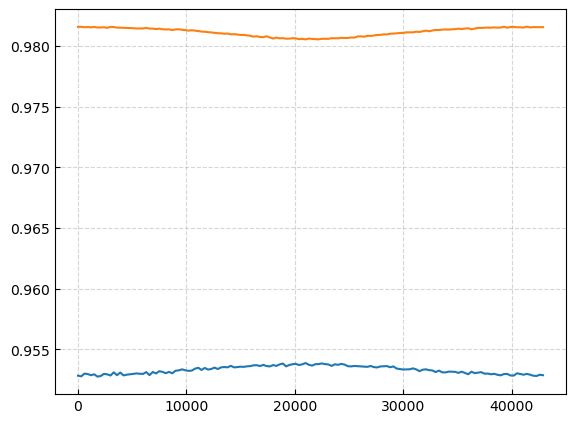

In [99]:
bus_id = 8
psse = psse_bus_data[psse_bus_data["BUS_ID.1"] == bus_id].V_PU


pypsa = pypsa_bus_data[pypsa_bus_data["Bus"] == bus_id].v_mag_pu

time = psse_bus_data[psse_bus_data["BUS_ID.1"] == bus_id].time_s


fig, ax = plt.subplots(figsize=(6.6, 5.0))

ax.plot(time, psse, label="PSS®E")

ax.plot(time, pypsa, label="PyPSA")

plt.show()


In [89]:
psse_bus_data[psse_bus_data["BUS_ID.1"] == bus_id].time_s

0           0.0
25        300.0
50        600.0
75        900.0
100      1200.0
         ...   
3475    41700.0
3500    42000.0
3525    42300.0
3550    42600.0
3575    42900.0
Name: time_s, Length: 144, dtype: float64

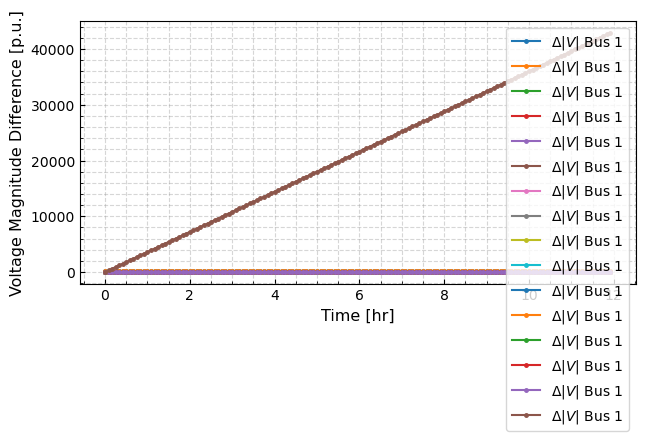

In [78]:
import matplotlib.pyplot as plt

bus_id = 1
psse = psse_bus_data[psse_bus_data["BUS_ID.1"] == bus_id].sort_values("time_s")
#pypsa = pypsa_bus_data[pypsa_bus_data["Bus"] == bus_id].sort_values("time_s")

time_hr = psse["time_s"].values / 3600

plt.figure(figsize=(6.6, 4))
plt.plot(time_hr, psse, marker='o', markersize=2.5, label=f"$\Delta|V|$ Bus {bus_id}")
plt.xlabel("Time [hr]")
plt.ylabel("Voltage Magnitude Difference [p.u.]")
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.minorticks_on()
plt.legend()
plt.tight_layout()
plt.show()

In [64]:
bus_id = 25
pypsa = pypsa_bus_data[pypsa_bus_data["Bus"] == bus_id].sort_values("time_s")
pypsa

,Bus,p,q,v_mag_pu,v_mag_pu_set,v_ang,mismatch,time_s
17,25,0.000000,-0.000000,1.0,NaN,-0.035329,0.000000e+00,0.0
42,25,0.134242,-0.044747,1.0,NaN,-0.035622,1.320039e-11,300.0
67,25,0.131979,-0.043993,1.0,NaN,-0.036184,4.557077e-12,600.0
92,25,0.135523,-0.045174,1.0,NaN,-0.036937,1.019376e-11,900.0
117,25,0.141530,-0.047176,1.0,NaN,-0.036861,9.041157e-12,1200.0
...,...,...,...,...,...,...,...,...
3492,25,0.126144,-0.042048,1.0,NaN,-0.037049,2.759043e-12,41700.0
3517,25,0.182256,-0.060752,1.0,NaN,-0.036578,6.750406e-12,42000.0
3542,25,0.124588,-0.041529,1.0,NaN,-0.036386,1.796660e-12,42300.0
3567,25,0.119888,-0.039963,1.0,NaN,-0.035944,2.750564e-12,42600.0


In [70]:
psse_bus_data

,BUS_ID,BUS_ID.1,BUS_TYPE,Pd,Qd,Pg,Qg,P,Q,V_PU,V_KV,BASE_KV,ANGLE_DEG,ANGLE_RAD,MISMATCH,time_s
0,0,1,3,0.0,0.000000,24.709679,65.376091,24.709679,65.376091,1.000000,138.000000,138.0,0.000000,0.000000,0.000003,0.0
1,1,2,2,97.0,20.000000,67.000000,0.000000,-30.000000,-20.000000,0.998570,137.802628,138.0,-0.006519,-0.000114,0.000006,0.0
2,2,3,1,90.0,19.000000,0.000000,0.000000,-90.000000,-19.000000,0.908059,125.312180,138.0,9.322610,0.162710,0.000006,0.0
3,3,4,1,74.0,15.000001,0.000000,0.000000,-74.000000,-15.000001,0.925067,127.659218,138.0,-0.675681,-0.011793,0.000003,0.0
4,4,5,1,71.0,14.000000,0.000000,0.000000,-71.000000,-14.000000,0.958868,132.323822,138.0,-0.503819,-0.008793,0.000003,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,20,21,2,0.0,0.000000,294.000000,0.000000,294.000000,0.000000,0.939450,216.073486,230.0,31.761387,0.554341,0.000003,42900.0
3596,21,22,2,0.0,0.000000,150.000000,126.865158,150.000000,126.865158,1.000000,230.000000,230.0,33.774643,0.589479,0.000006,42900.0
3597,22,23,2,0.0,0.000000,200.000000,0.000000,200.000000,0.000000,0.905711,208.313599,230.0,18.942007,0.330600,0.000003,42900.0
3598,23,24,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.895935,206.064941,230.0,21.830488,0.381014,0.000000,42900.0


In [55]:
pypsa_bus_data

,Bus,p,q,v_mag_pu,v_mag_pu_set,v_ang,mismatch,time_s
0,1,13.178339,-111.547059,1.000000,NaN,0.000000,8.384404e-13,0.0
1,10,-100.000000,-23.000000,1.005391,NaN,0.033608,2.237981e+02,0.0
2,11,0.000000,0.000000,0.990402,NaN,0.151724,2.546880e+02,0.0
3,12,0.000000,0.000000,0.989454,NaN,0.140167,2.275320e+02,0.0
4,13,70.000000,23.044123,1.000000,NaN,0.185431,1.207923e-12,0.0
...,...,...,...,...,...,...,...,...
3595,5,-71.190452,-14.000000,0.988192,NaN,-0.013458,8.398615e-12,42900.0
3596,6,-68.131627,-14.000000,1.018806,NaN,-0.008482,7.062795e-12,42900.0
3597,7,1.934570,28.845516,1.000000,NaN,-0.036007,2.089049e+00,42900.0
3598,8,-85.085816,-18.000000,0.981555,NaN,-0.032426,8.508582e+01,42900.0


In [50]:
psse_bus_data

,BUS_ID,BUS_ID.1,BUS_TYPE,Pd,Qd,Pg,Qg,P,Q,V_PU,V_KV,BASE_KV,ANGLE_DEG,ANGLE_RAD,MISMATCH,time_s
0,0,1,3,0.0,0.000000,24.709679,65.376091,24.709679,65.376091,1.000000,138.000000,138.0,0.000000,0.000000,0.000003,0.0
1,1,2,2,97.0,20.000000,67.000000,0.000000,-30.000000,-20.000000,0.998570,137.802628,138.0,-0.006519,-0.000114,0.000006,0.0
2,2,3,1,90.0,19.000000,0.000000,0.000000,-90.000000,-19.000000,0.908059,125.312180,138.0,9.322610,0.162710,0.000006,0.0
3,3,4,1,74.0,15.000001,0.000000,0.000000,-74.000000,-15.000001,0.925067,127.659218,138.0,-0.675681,-0.011793,0.000003,0.0
4,4,5,1,71.0,14.000000,0.000000,0.000000,-71.000000,-14.000000,0.958868,132.323822,138.0,-0.503819,-0.008793,0.000003,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,20,21,2,0.0,0.000000,294.000000,0.000000,294.000000,0.000000,0.939450,216.073486,230.0,31.761387,0.554341,0.000003,42900.0
3596,21,22,2,0.0,0.000000,150.000000,126.865158,150.000000,126.865158,1.000000,230.000000,230.0,33.774643,0.589479,0.000006,42900.0
3597,22,23,2,0.0,0.000000,200.000000,0.000000,200.000000,0.000000,0.905711,208.313599,230.0,18.942007,0.330600,0.000003,42900.0
3598,23,24,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.895935,206.064941,230.0,21.830488,0.381014,0.000000,42900.0


In [39]:
psse_bus_data

,BUS_ID,BUS_ID.1,BUS_TYPE,Pd,Qd,Pg,Qg,P,Q,V_PU,V_KV,BASE_KV,ANGLE_DEG,ANGLE_RAD,MISMATCH,time_s
0,0,1,3,0.0,0.000000,24.709679,65.376091,24.709679,65.376091,1.000000,138.000000,138.0,0.000000,0.000000,0.000003,0.0
1,1,2,2,97.0,20.000000,67.000000,0.000000,-30.000000,-20.000000,0.998570,137.802628,138.0,-0.006519,-0.000114,0.000006,0.0
2,2,3,1,90.0,19.000000,0.000000,0.000000,-90.000000,-19.000000,0.908059,125.312180,138.0,9.322610,0.162710,0.000006,0.0
3,3,4,1,74.0,15.000001,0.000000,0.000000,-74.000000,-15.000001,0.925067,127.659218,138.0,-0.675681,-0.011793,0.000003,0.0
4,4,5,1,71.0,14.000000,0.000000,0.000000,-71.000000,-14.000000,0.958868,132.323822,138.0,-0.503819,-0.008793,0.000003,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,20,21,2,0.0,0.000000,294.000000,0.000000,294.000000,0.000000,0.939450,216.073486,230.0,31.761387,0.554341,0.000003,42900.0
3596,21,22,2,0.0,0.000000,150.000000,126.865158,150.000000,126.865158,1.000000,230.000000,230.0,33.774643,0.589479,0.000006,42900.0
3597,22,23,2,0.0,0.000000,200.000000,0.000000,200.000000,0.000000,0.905711,208.313599,230.0,18.942007,0.330600,0.000003,42900.0
3598,23,24,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.895935,206.064941,230.0,21.830488,0.381014,0.000000,42900.0


In [40]:
pypsa_bus_data

,Bus,p,q,v_mag_pu,v_mag_pu_set,v_ang,mismatch,time_s
0,1,13.178339,-111.547059,1.000000,NaN,0.000000,8.384404e-13,0.0
1,10,-100.000000,-23.000000,1.005391,NaN,0.033608,2.237981e+02,0.0
2,11,0.000000,0.000000,0.990402,NaN,0.151724,2.546880e+02,0.0
3,12,0.000000,0.000000,0.989454,NaN,0.140167,2.275320e+02,0.0
4,13,70.000000,23.044123,1.000000,NaN,0.185431,1.207923e-12,0.0
...,...,...,...,...,...,...,...,...
3595,5,-71.190452,-14.000000,0.988192,NaN,-0.013458,8.398615e-12,42900.0
3596,6,-68.131627,-14.000000,1.018806,NaN,-0.008482,7.062795e-12,42900.0
3597,7,1.934570,28.845516,1.000000,NaN,-0.036007,2.089049e+00,42900.0
3598,8,-85.085816,-18.000000,0.981555,NaN,-0.032426,8.508582e+01,42900.0
